Using backend: pytorch



Compiling model...
'compile' took 0.000318 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [4.37e+01, 6.02e-02]    [4.94e+01, 6.02e-02]    [1.17e+00]    
100       [1.18e+00, 5.36e-02]    [1.04e+00, 5.36e-02]    [1.41e-01]    
200       [1.16e-01, 2.62e-03]    [6.33e-02, 2.62e-03]    [4.70e-02]    
300       [8.86e-03, 6.81e-05]    [4.67e-03, 6.81e-05]    [7.07e-03]    
400       [2.52e-03, 6.81e-06]    [1.32e-03, 6.81e-06]    [2.15e-03]    
500       [1.40e-03, 1.39e-06]    [9.53e-04, 1.39e-06]    [9.84e-04]    
600       [9.36e-04, 6.66e-07]    [7.40e-04, 6.66e-07]    [7.28e-04]    
700       [7.00e-04, 3.78e-07]    [6.29e-04, 3.78e-07]    [5.87e-04]    
800       [5.57e-04, 2.27e-07]    [5.50e-04, 2.27e-07]    [4.88e-04]    
900       [4.59e-04, 1.45e-07]    [4.87e-04, 1.45e-07]    [4.15e-04]    
1000      [3.95e-04, 2.22e-07]    [4.30e-04, 2.22e-07]    [4.55e-04]    

Best model at step 1000:
  train loss: 3.96e-04
  test los

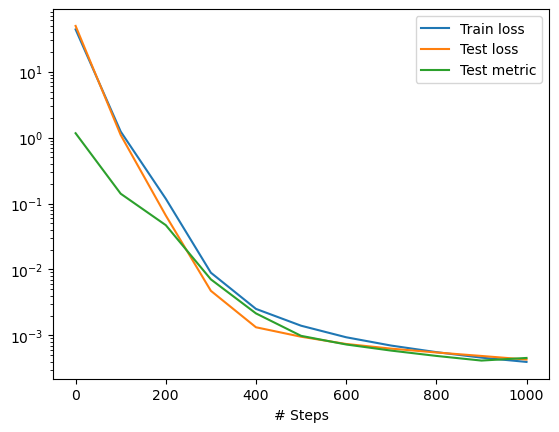

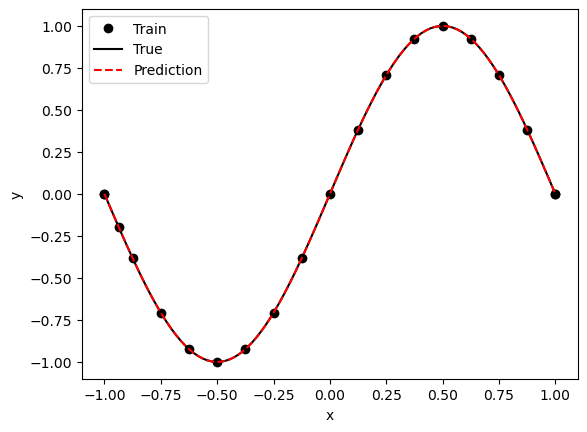

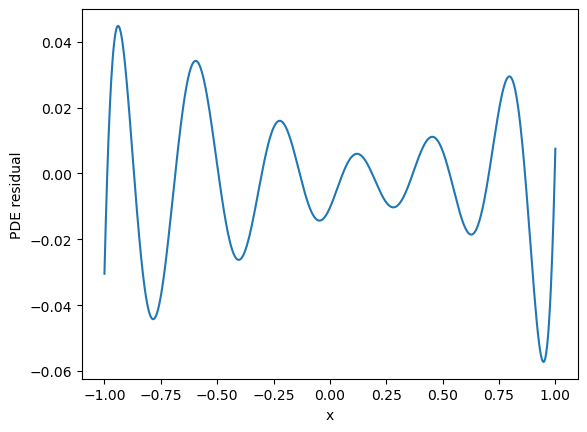

In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import os
os.environ['DDE_BACKEND']="pytorch"

import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
import torch

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=1000, display_every = 100)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

